<a href="https://colab.research.google.com/github/lspajic20/Projekt---Python/blob/main/SUIS_Projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Prikaz deskriptivnih statistika i distribucija varijabli

In [ ]:
data = pd.read_csv('online_shoppers_intention.csv')
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
data['Revenue'] = data['Revenue'].astype('category')
data['VisitorType'] = data['VisitorType'].astype('category')
data['Weekend'] = data['Weekend'].astype('category')
data['OperatingSystems'] = data['OperatingSystems'].astype('category')
data['Browser'] = data['Browser'].astype('category')
data['Region'] = data['Region'].astype('category')
data['TrafficType'] = data['TrafficType'].astype('category')
data['Month'] = data['Month'].astype('category')



In [ ]:
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


In [ ]:
data.describe(include=['category']).loc[['top', 'freq']]

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
top,May,2,2,1,2,Returning_Visitor,False,False
freq,3364,6601,7961,4780,3913,10551,9462,10422


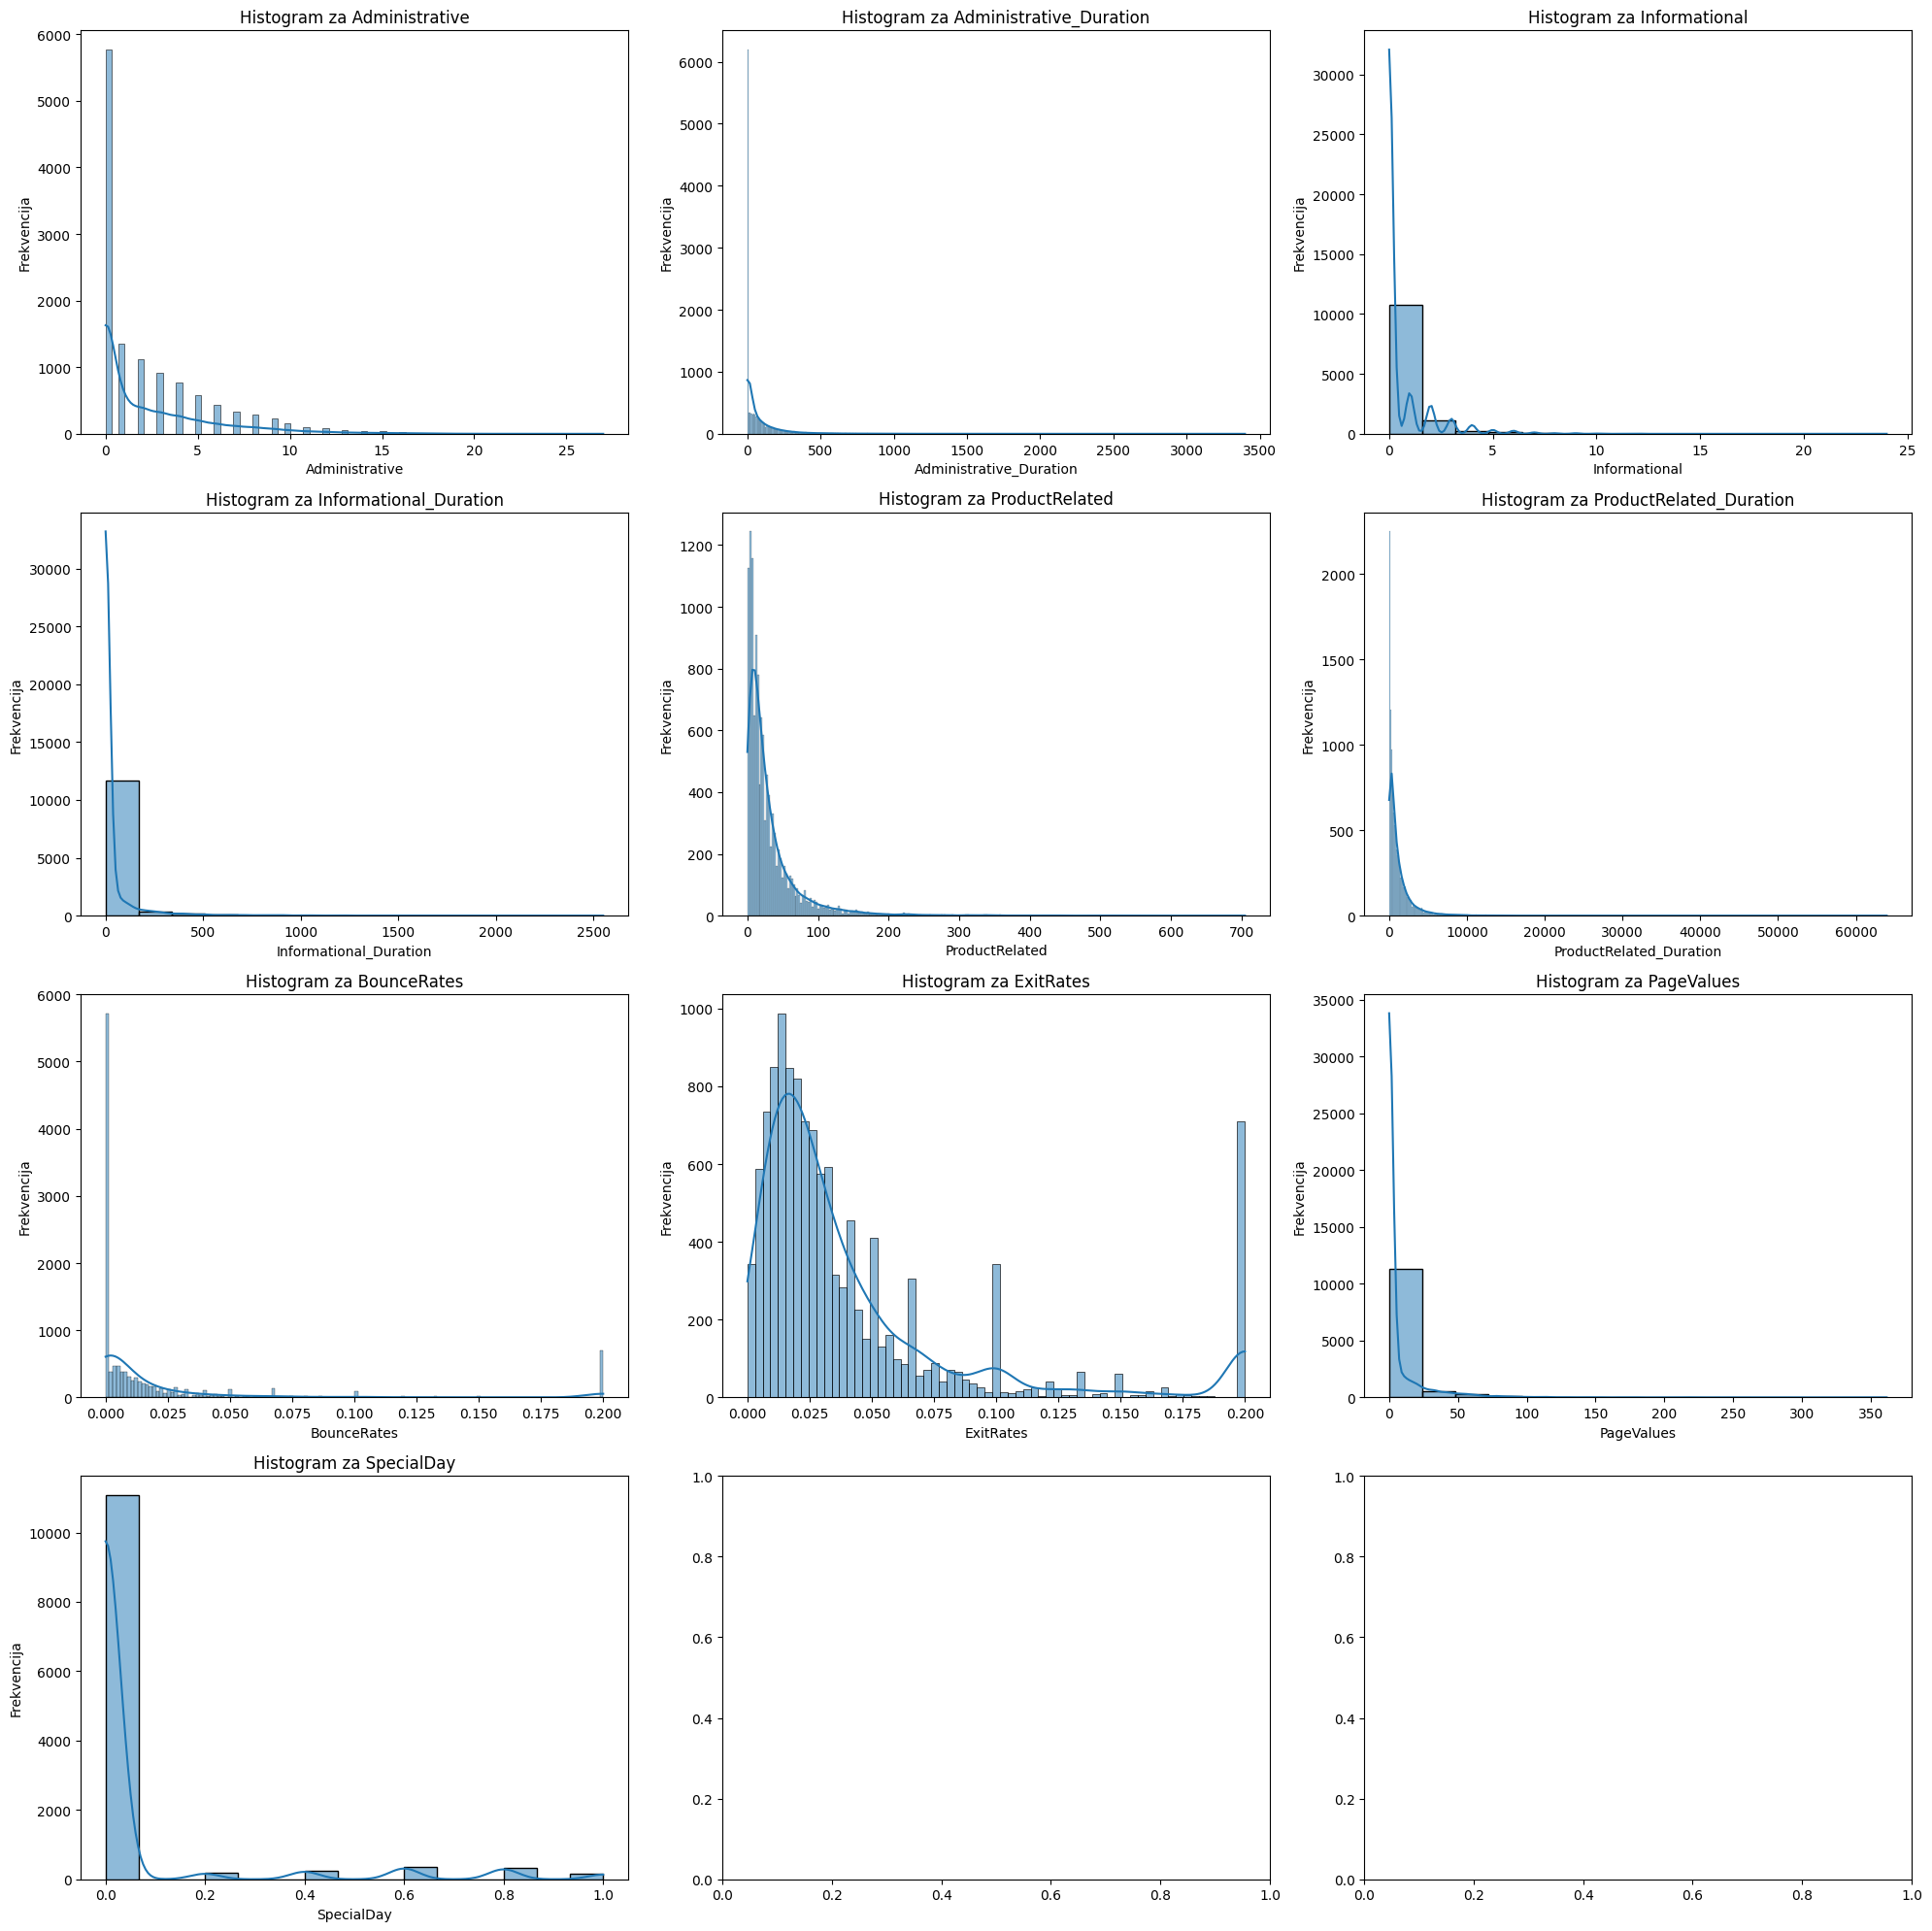

In [ ]:
# Histogrami za sve numeričke varijable
numerical_columns = data.select_dtypes(include='number').columns
fig, axes = plt.subplots(4, 3, figsize=(20, 20))

for i, varijabla in enumerate(numerical_columns):
    ax = axes.flat[i]
    sns.histplot(data[varijabla], ax=ax, kde=True)
    ax.set_title(f'Histogram za {varijabla}')
    ax.set_xlabel(varijabla)
    ax.set_ylabel('Frekvencija')

plt.tight_layout()
plt.show()


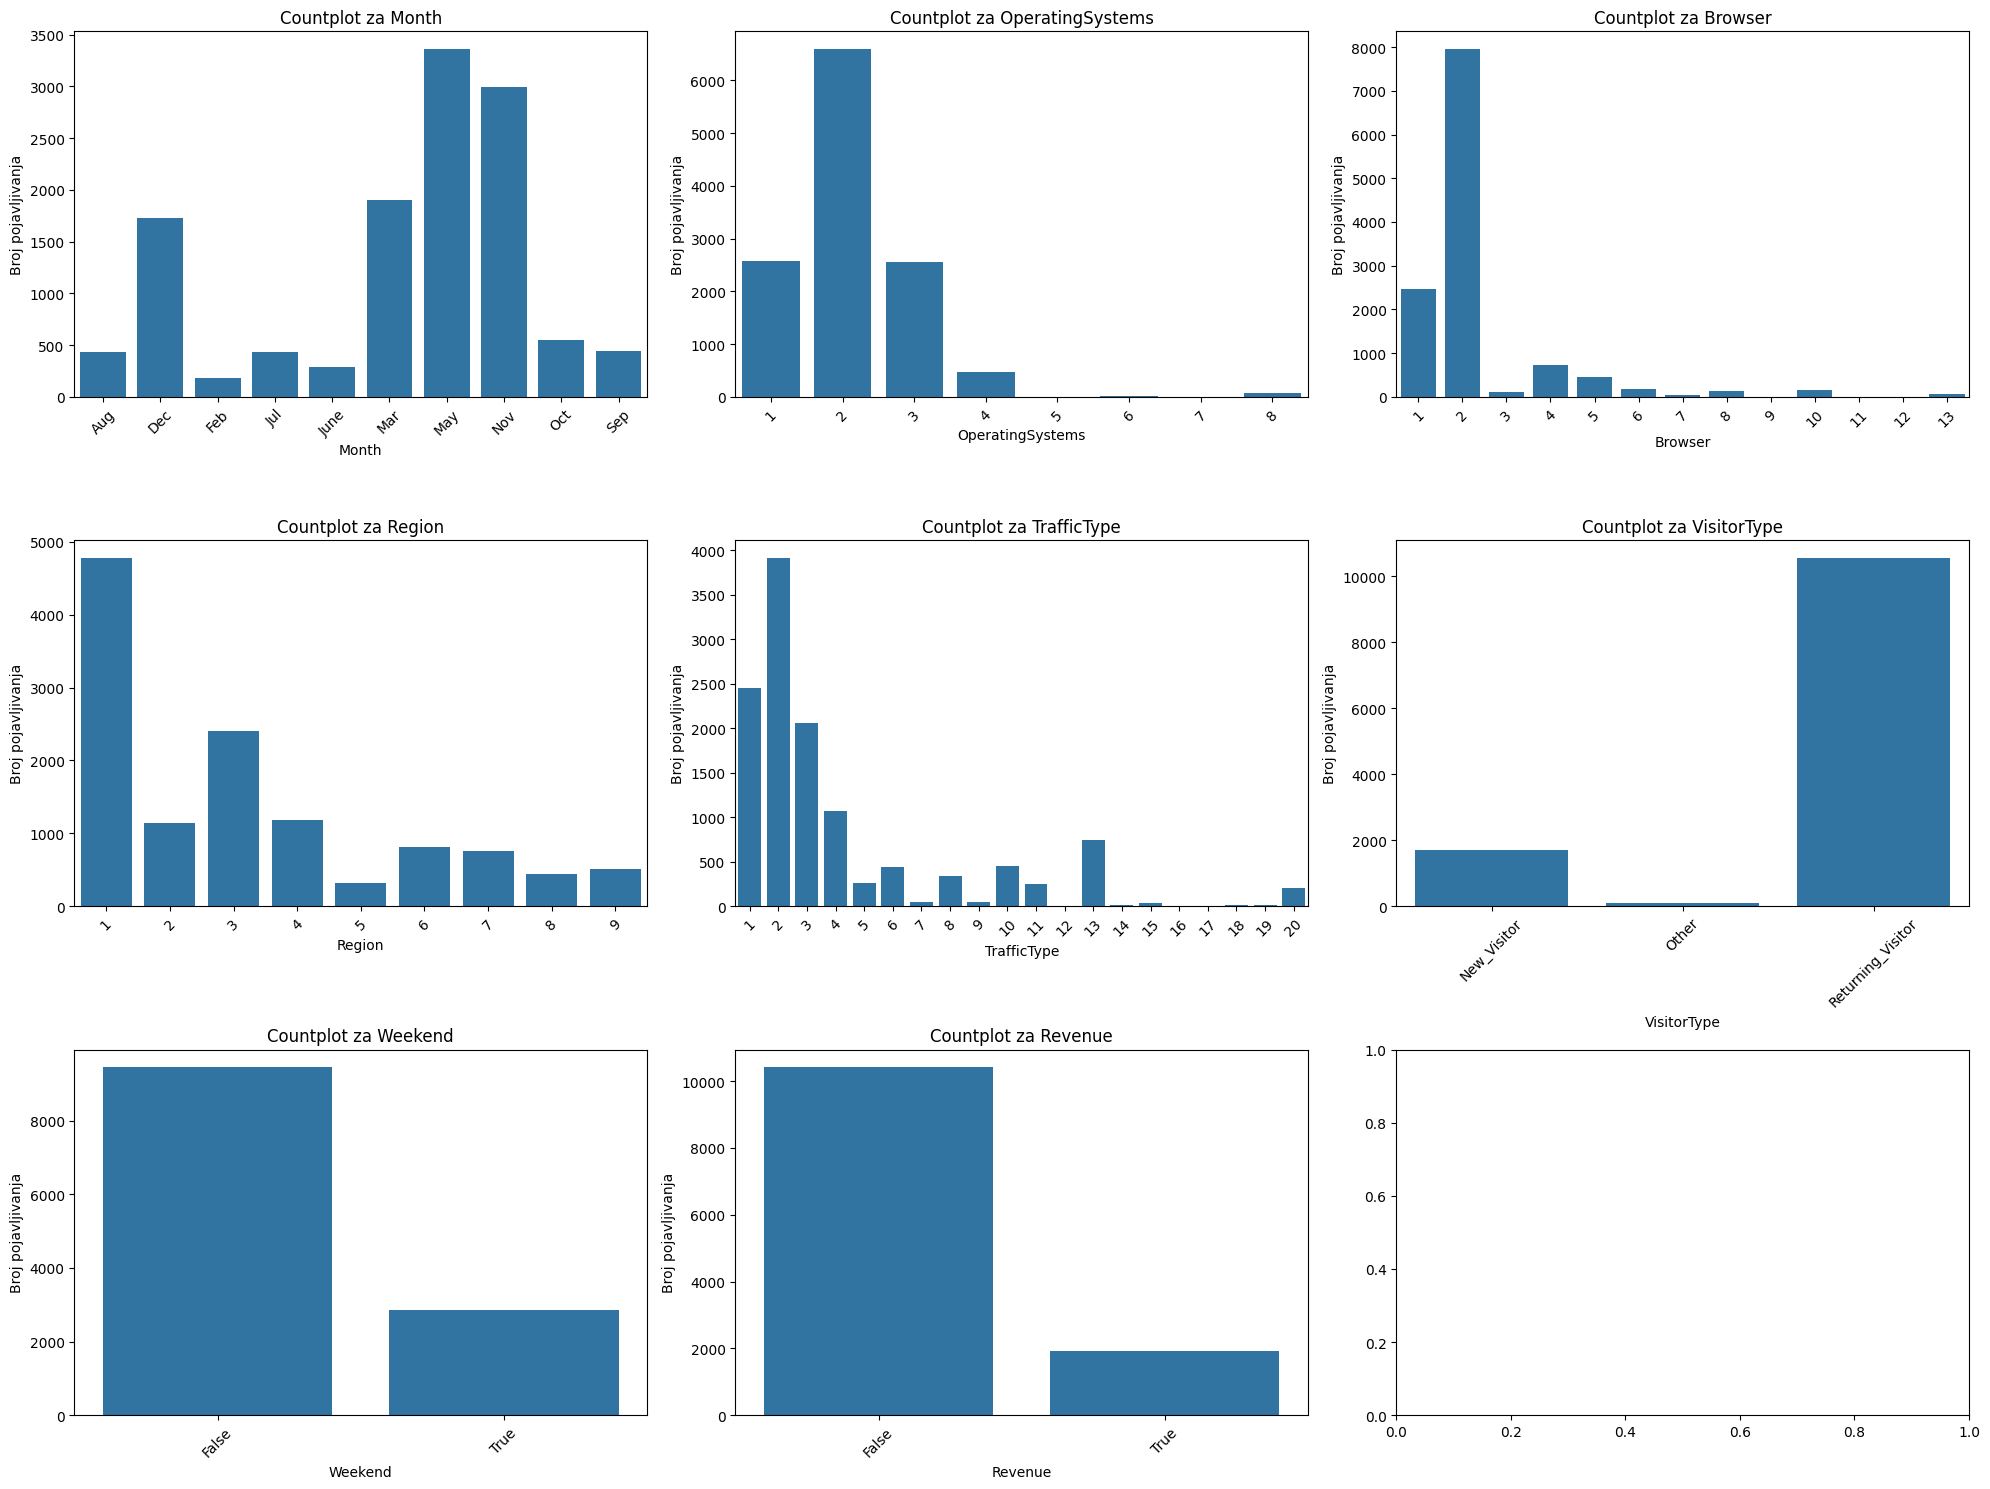

In [ ]:
# Countplot-ovi za sve kategorijske varijable
categorical_columns = data.select_dtypes(include='category').columns
fig, axes = plt.subplots(3, 3, figsize=(20, 15))

for i, varijabla in enumerate(categorical_columns):
    ax = axes.flat[i]
    sns.countplot(data=data, x=varijabla, ax=ax)
    ax.set_title(f'Countplot za {varijabla}')
    ax.set_xlabel(varijabla)
    ax.set_ylabel('Broj pojavljivanja')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

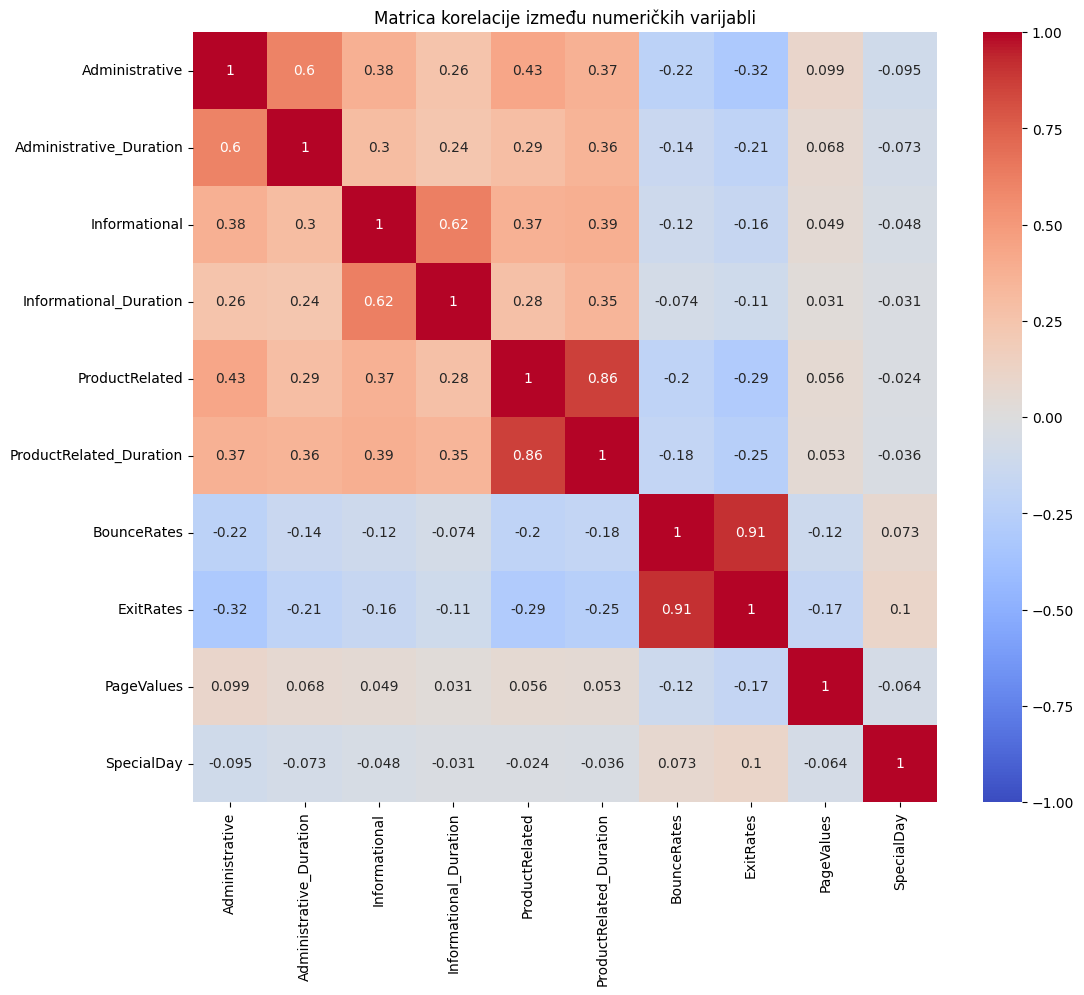

In [ ]:
# Izračun matrice korelacije
correlation_matrix = data.select_dtypes(include='number').corr()

# Prikaz matrice korelacije kao heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrica korelacije između numeričkih varijabli')
plt.show()


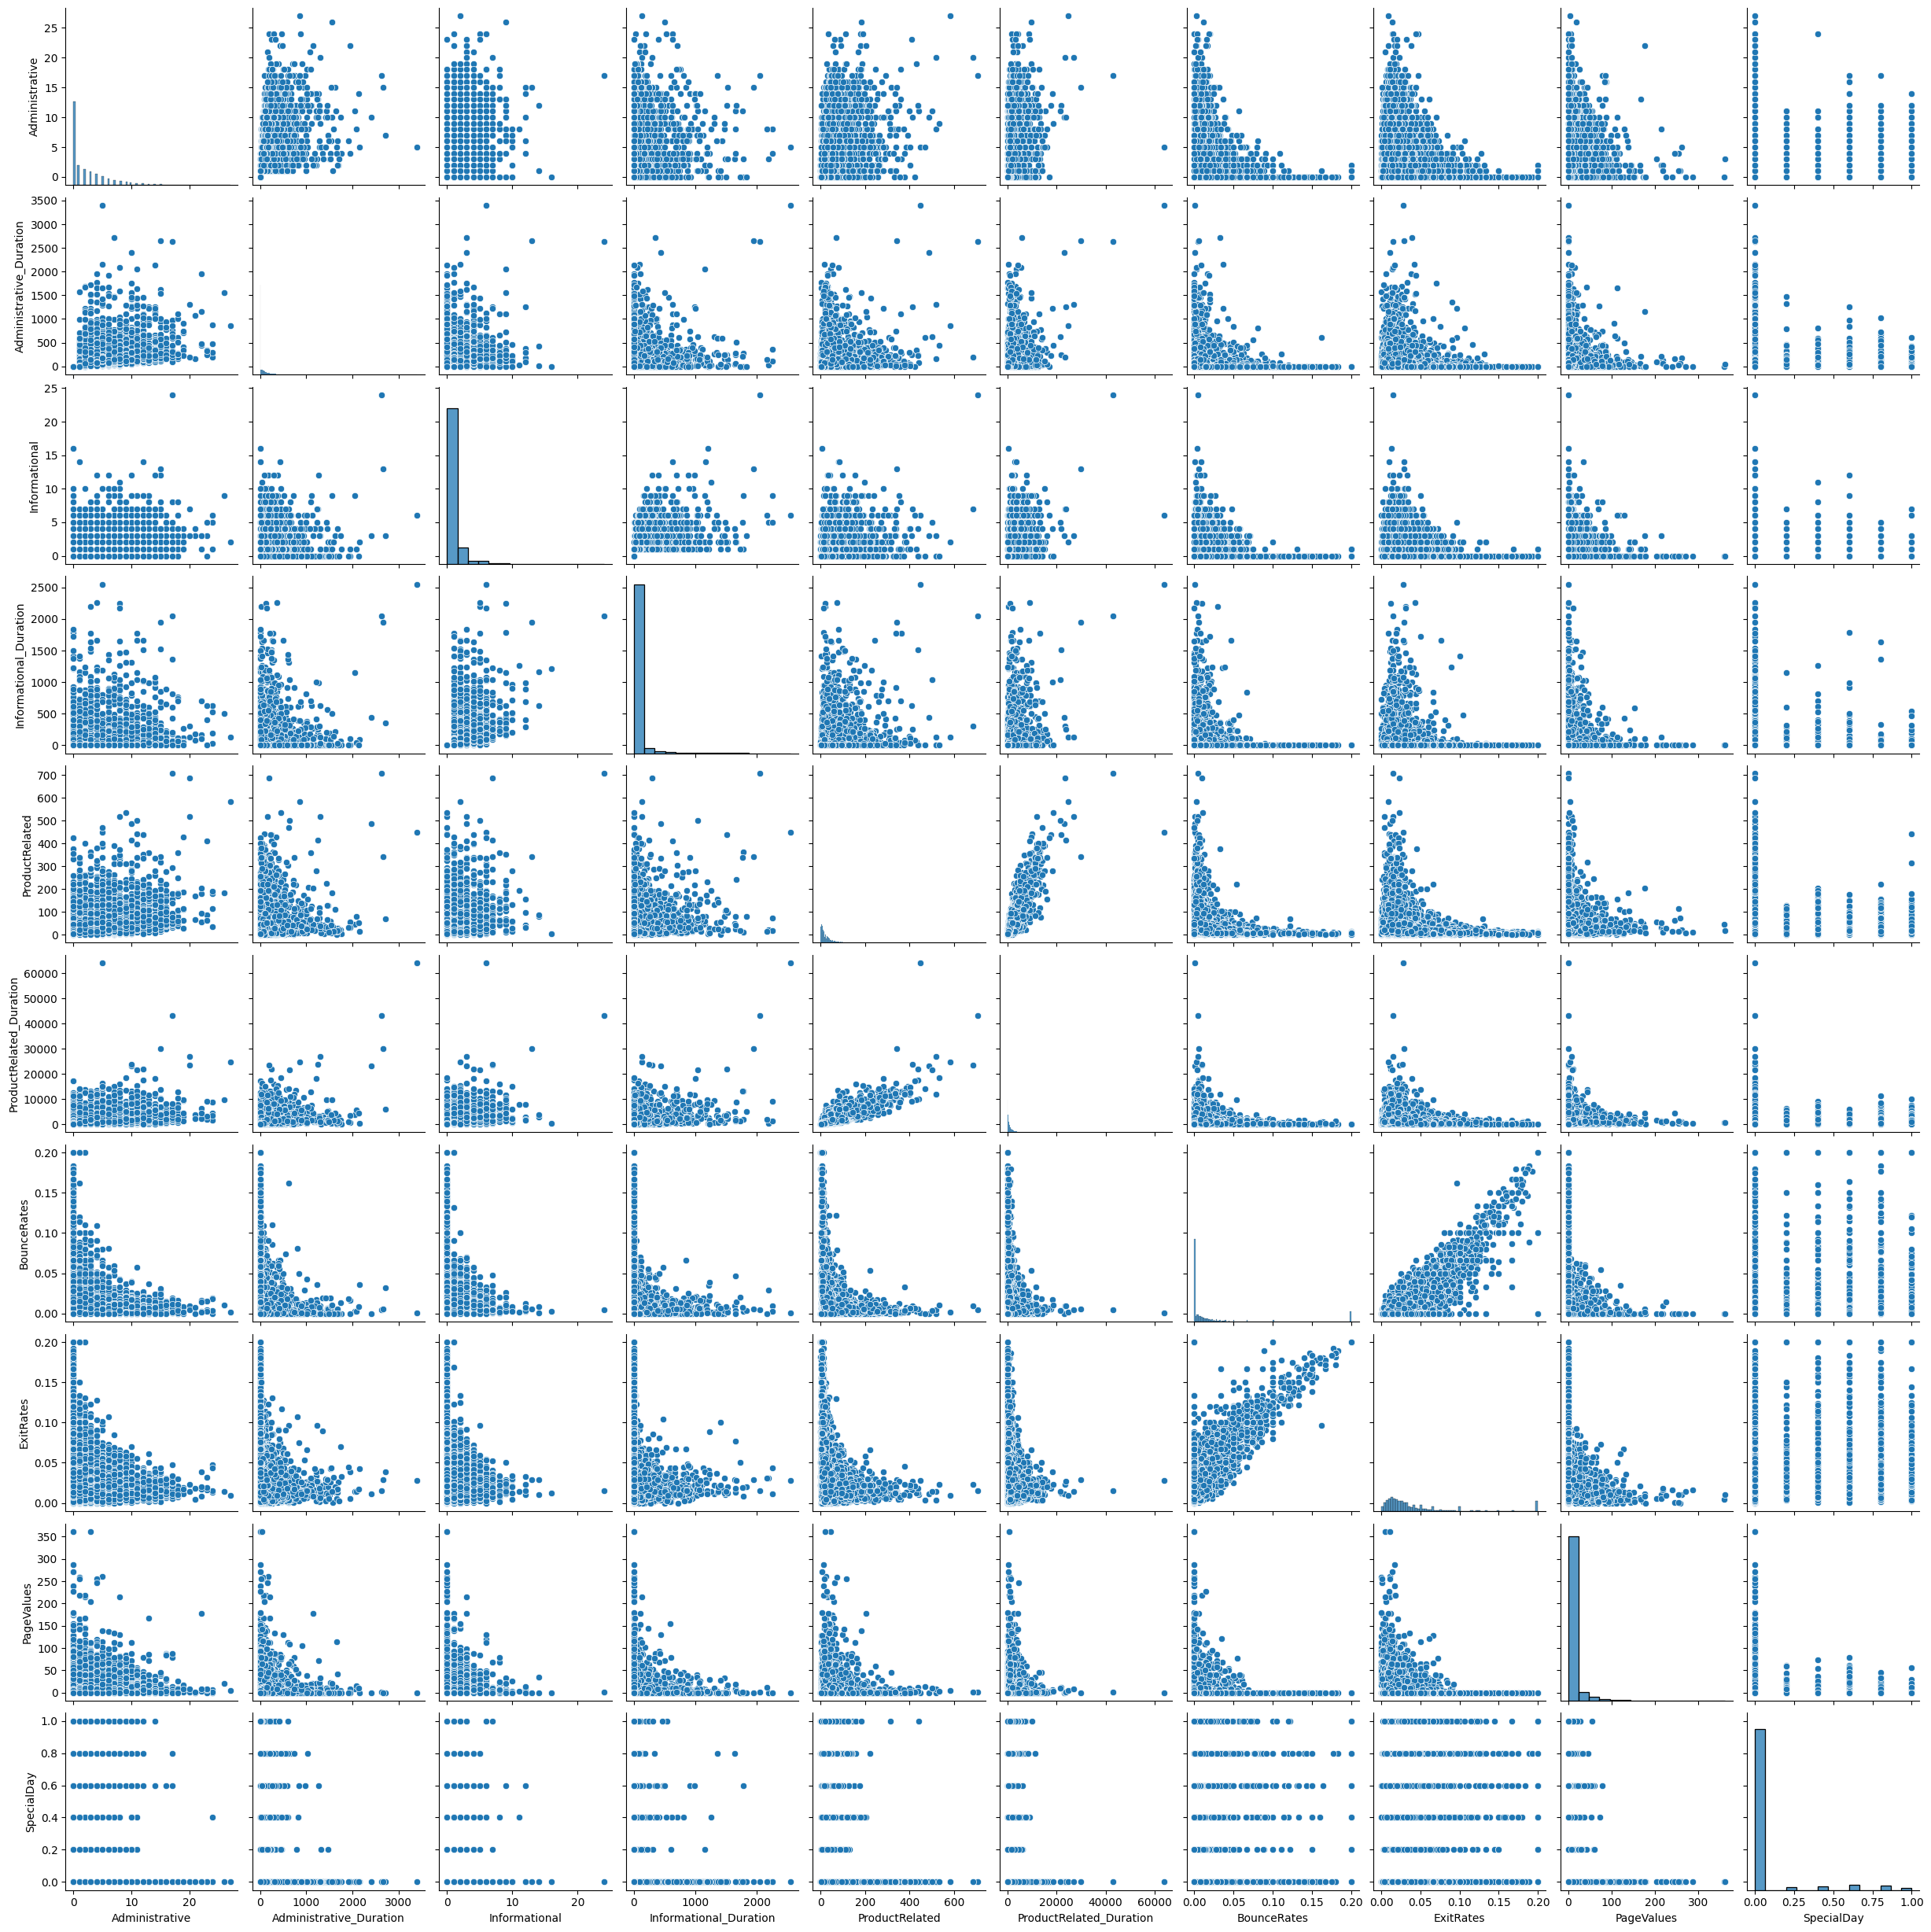

In [ ]:
# Scatter plot matrica
sns.pairplot(data.select_dtypes(include='number'))
plt.show()


Nedostajuće vrijednosti po stupcima:
Series([], dtype: int64)

Broj dupliciranih zapisa: 125


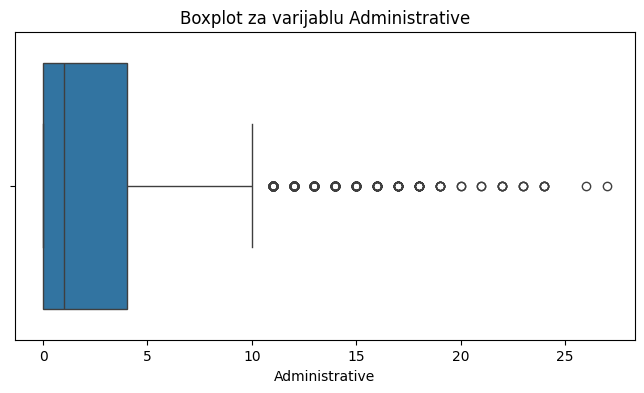

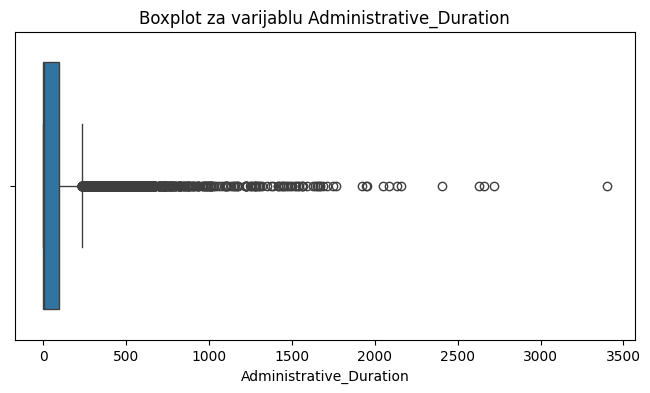

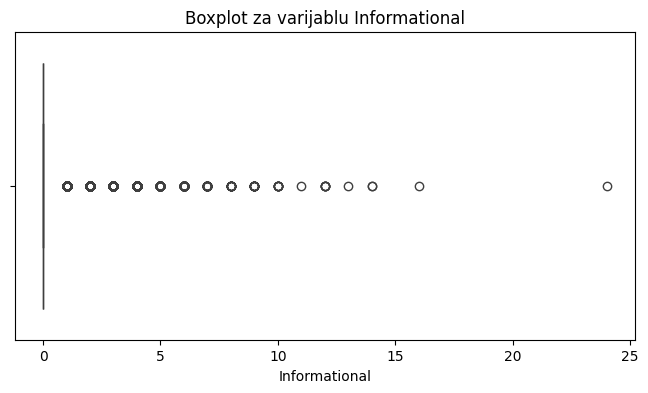

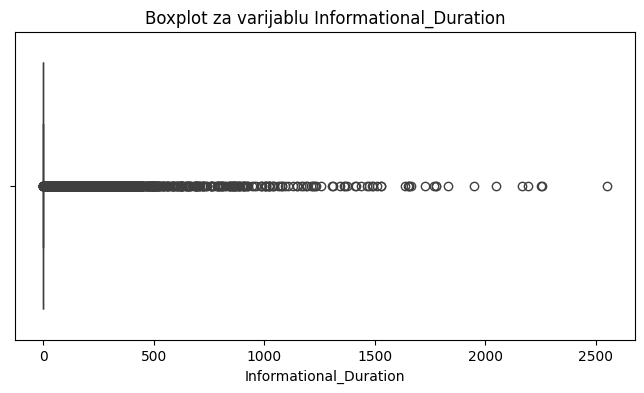

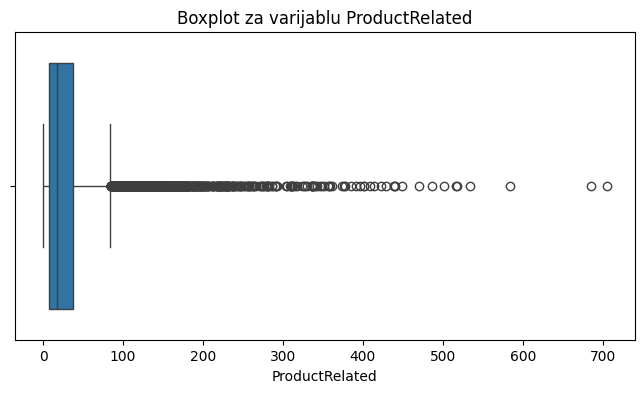

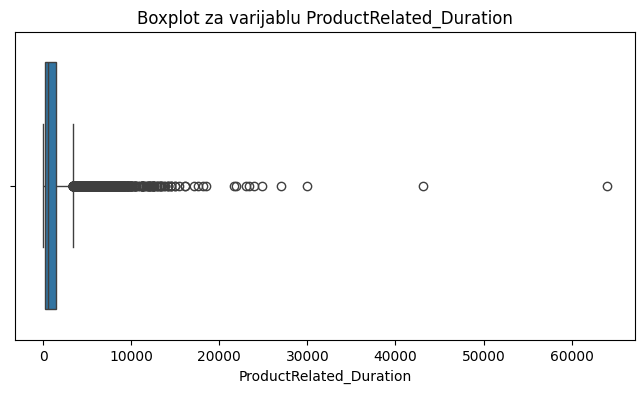

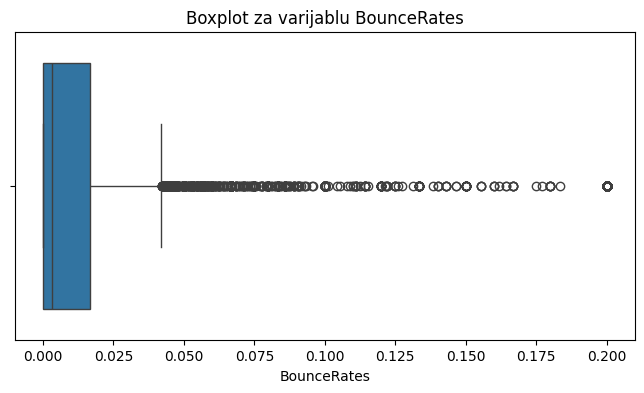

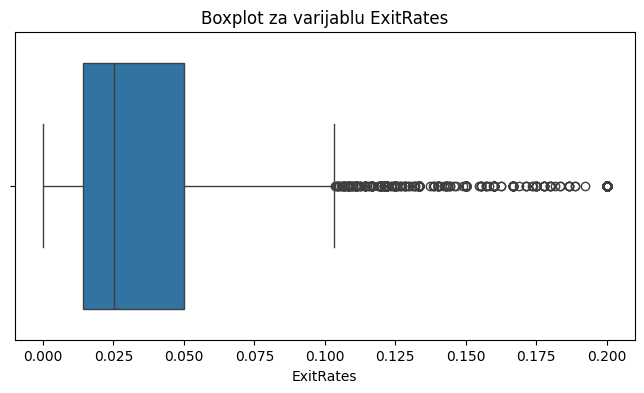

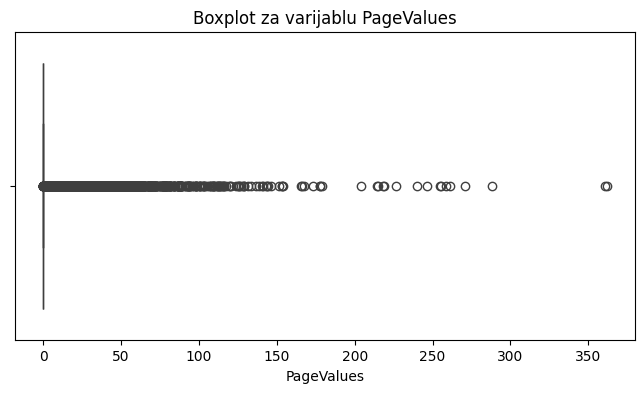

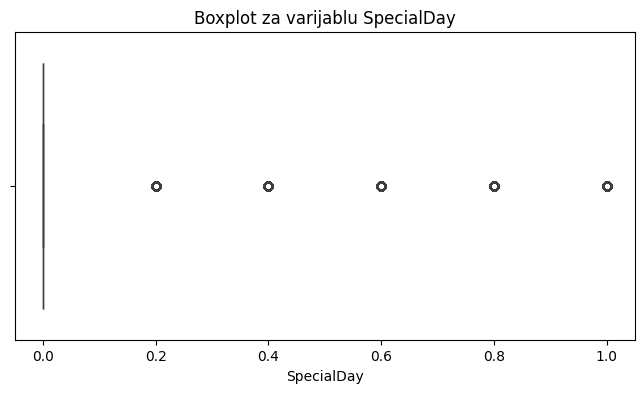

Administrative: 213
Administrative_Duration: 232
Informational: 260
Informational_Duration: 230
ProductRelated: 236
ProductRelated_Duration: 219
BounceRates: 708
ExitRates: 713
PageValues: 259
SpecialDay: 479


In [ ]:


# 1. Provjera nedostajućih vrijednosti
missing_values = data.isnull().sum()
print("Nedostajuće vrijednosti po stupcima:")
print(missing_values[missing_values > 0])

# 2. Provjera dupliciranih zapisa
duplicates = data.duplicated().sum()
print(f"\nBroj dupliciranih zapisa: {duplicates}")

# 3. Identifikacija ekstremnih vrijednosti (outliers)
# Primjena boxplota za identifikaciju outliera u numeričkim varijablama
numerical_columns = data.select_dtypes(include=[np.number]).columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col])
    plt.title(f"Boxplot za varijablu {col}")
    plt.show()

# Metoda Z-score za identifikaciju outliera
from scipy import stats

outliers_count = {}
numerical_columns = data.select_dtypes(include=[np.number]).columns

for col in numerical_columns:
    z_scores = np.abs(stats.zscore(data[col].dropna()))  # Računanje Z-score vrijednosti
    outliers_count[col] = np.sum(z_scores > 3)  # Brojanje outliera koji su izvan 3 standardne devijacije

for col, count in outliers_count.items():
    print(f"{col}: {count}")


# Deskriptivno modeliranje (klasteriranje):

## Priprema podataka

### **Uklanjanje dupliciranih podatkovnih točaka**

In [ ]:
unwanted_columns = ['Administrative', 'Informational', 'ProductRelated']
data.drop(columns=unwanted_columns, inplace=True)

data.drop_duplicates(keep='first', inplace=True)

# Provjera dupliciranih zapisa nakon uklanjanja
duplicates = data.duplicated().sum()
print(f"\nBroj dupliciranih zapisa: {duplicates}")

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

# Provjera i rješavanje eventualnih NaN vrijednosti u numeričkim stupcima
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


Broj dupliciranih zapisa: 0


### **Kodiranje kategorijskih atributa**

In [ ]:
# Pretvaranje kategoričkih značajki u binarne
data = pd.get_dummies(data, dtype=int)

data.head()

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,...,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True,Revenue_False,Revenue_True
0,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
1,0.0,0.0,64.000000,0.00,0.10,0.0,0.0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
2,0.0,0.0,0.000000,0.20,0.20,0.0,0.0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
3,0.0,0.0,2.666667,0.05,0.14,0.0,0.0,0,0,1,...,0,0,0,0,0,1,1,0,1,0
4,0.0,0.0,627.500000,0.02,0.05,0.0,0.0,0,0,1,...,0,0,0,0,0,1,0,1,1,0


### **Skaliranje atributa**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(data[numerical_columns])

# Pretvaranje skaliranih podataka u DataFrame s originalnim nazivima stupaca
scaled_data = pd.DataFrame(scaled_data, columns=numerical_columns)

# Izdvajanje preostalih kategorijskih stupaca (koji nisu skalirani)
encoded_features = data.drop(columns=numerical_columns)

# Kombiniranje skaliranih numeričkih podataka s netaknutim kategorijskim stupcima
final_data = pd.concat([scaled_data, encoded_features.reset_index(drop=True)], axis=1)

print(final_data.head())

   Administrative_Duration  Informational_Duration  ProductRelated_Duration  \
0                -0.461119               -0.246772                -0.630525   
1                -0.461119               -0.246772                -0.597223   
2                -0.461119               -0.246772                -0.630525   
3                -0.461119               -0.246772                -0.629138   
4                -0.461119               -0.246772                -0.304010   

   BounceRates  ExitRates  PageValues  SpecialDay  Month_Aug  Month_Dec  \
0     4.107032   3.524208   -0.319656   -0.310313          0          0   
1    -0.447761   1.309958   -0.319656   -0.310313          0          0   
2     4.107032   3.524208   -0.319656   -0.310313          0          0   
3     0.690938   2.195658   -0.319656   -0.310313          0          0   
4     0.007719   0.202833   -0.319656   -0.310313          0          0   

   Month_Feb  ...  TrafficType_18  TrafficType_19  TrafficType_20  \
0    

## Klasteriranje

In [ ]:
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN

### Metoda lakta za pronalaženje optimalnog broja klastera u K-means

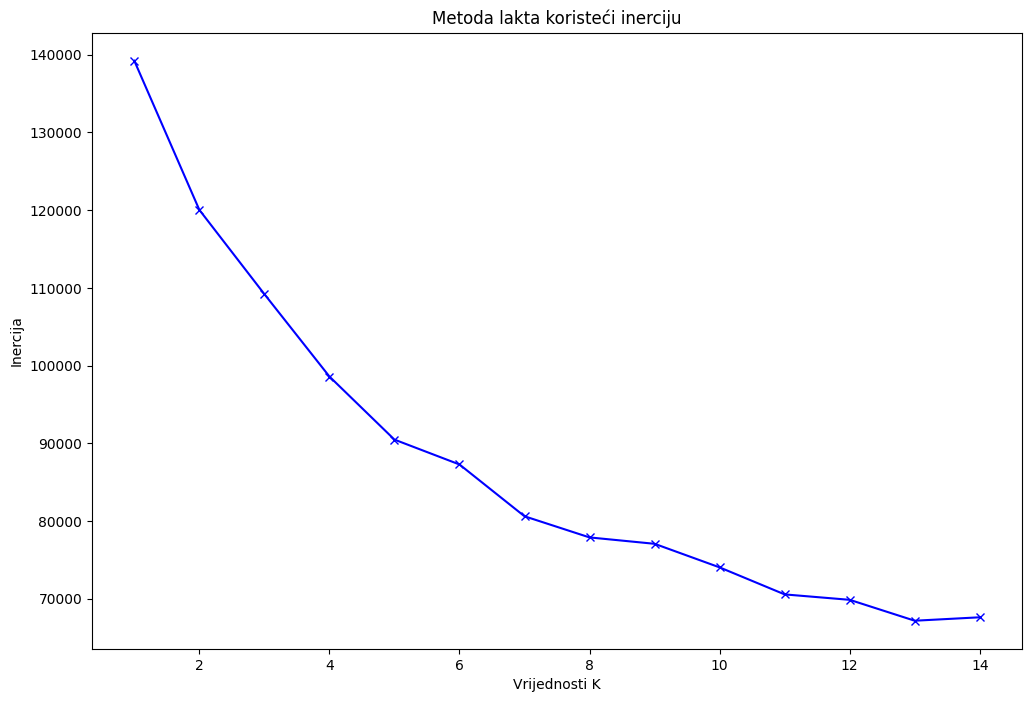

In [ ]:
# Metoda lakta za odabir parametra K

inertia = []  # Inicijalizira se prazan popis za spremanje vrijednosti inercije za svaki broj klastera K
range_val = range(1, 15)  # Definira raspon broja klastera K koje ćemo isprobati (od 1 do 14)

for i in range_val:
    kmean = KMeans(n_clusters=i)  # Kreira K-means model za određeni broj klastera (i)
    kmean.fit(final_data)  # Treniranje K-means modela na skupu podataka customer_scaled_df
    inertia.append(kmean.inertia_)  # Dodavanje inercije za broj klastera i u popis

# Prikaz grafa metode lakta
plt.figure(figsize=(12, 8))
plt.plot(range_val, inertia, 'bx-')
plt.xlabel('Vrijednosti K')
plt.ylabel('Inercija')
plt.title('Metoda lakta koristeći inerciju')
plt.show()


- Iz gornjeg grafa vidimo da je **K = 3** najbolja K vrijednost za klasteriranje. Kako bi se dodatno uvjerili koristili smo algoritam koji bi provjeravao Silhouette rezultat za svaki K od 2 do 14.

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

range_val = range(2, 15)
silhouette_scores = []

print("Silhouette score za svaku vrijednost K:")
for k in range_val:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(final_data)
    score = silhouette_score(final_data, clusters)
    silhouette_scores.append(score)
    print(f'K = {k}: Silhouette score = {score:.4f}')

# Prikaz optimalnog K s najvećim silhouette score-om
optimal_k = range_val[silhouette_scores.index(max(silhouette_scores))]
optimal_score = max(silhouette_scores)

print("\nOptimalni broj klastera prema Silhouette analizi:")
print(f'Optimalni K = {optimal_k} s Silhouette score = {optimal_score:.4f}')

Silhouette score za svaku vrijednost K:
K = 2: Silhouette score = 0.3373
K = 3: Silhouette score = 0.2552
K = 4: Silhouette score = 0.2558
K = 5: Silhouette score = 0.2674
K = 6: Silhouette score = 0.1302
K = 7: Silhouette score = 0.1202
K = 8: Silhouette score = 0.1148
K = 9: Silhouette score = 0.1047
K = 10: Silhouette score = 0.1105
K = 11: Silhouette score = 0.1069
K = 12: Silhouette score = 0.1081
K = 13: Silhouette score = 0.1104
K = 14: Silhouette score = 0.1130

Optimalni broj klastera prema Silhouette analizi:
Optimalni K = 2 s Silhouette score = 0.3373


Ovi rezultati pokazuju kako bi za broj klastera trebalo uzeti K=2 ili K=3.

Uzet ćemo K=3.

### Izrada modela za cijeli dataset

In [ ]:
# K-means klasteriranje
kmeans_model=KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
kmeans_clusters = kmeans_model.fit_predict(final_data)

from sklearn.metrics import silhouette_score

# Ispisivanje Silhouette ocjene
print(f'KMeans Silhouette score: {silhouette_score(final_data, kmeans_clusters):.4f}')

KMeans Silhouette score: 0.2674


### Administrative_Duration i BounceRates

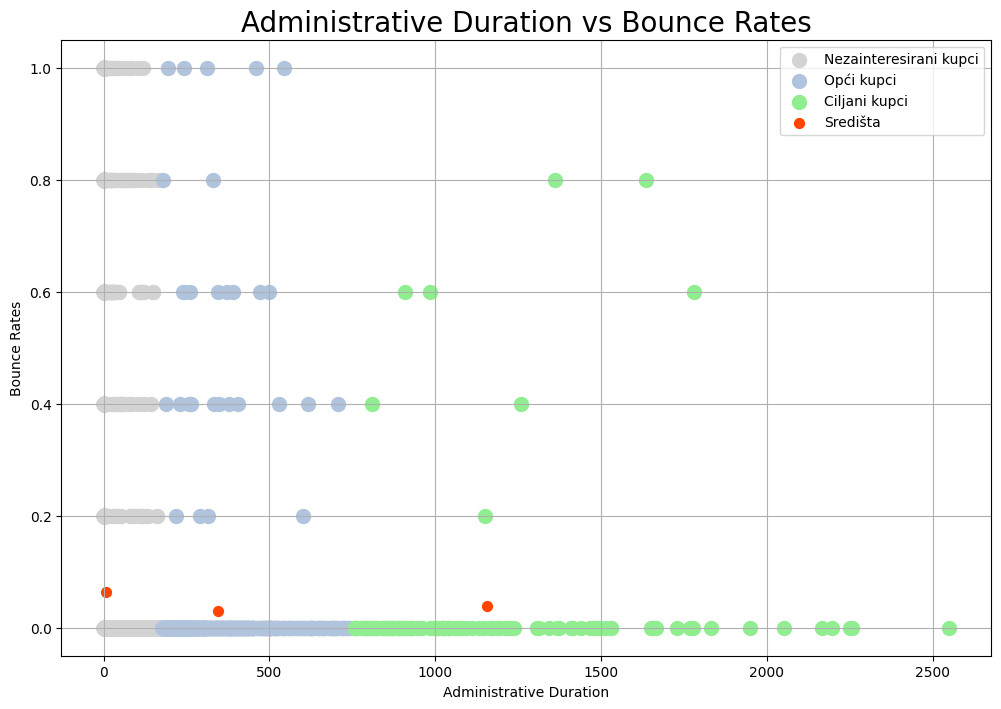

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = data.iloc[:, [1, 6]].values #Administrative Duration i Bounce Rates
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('Administrative Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('Administrative Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### Informational_Duration i BounceRates

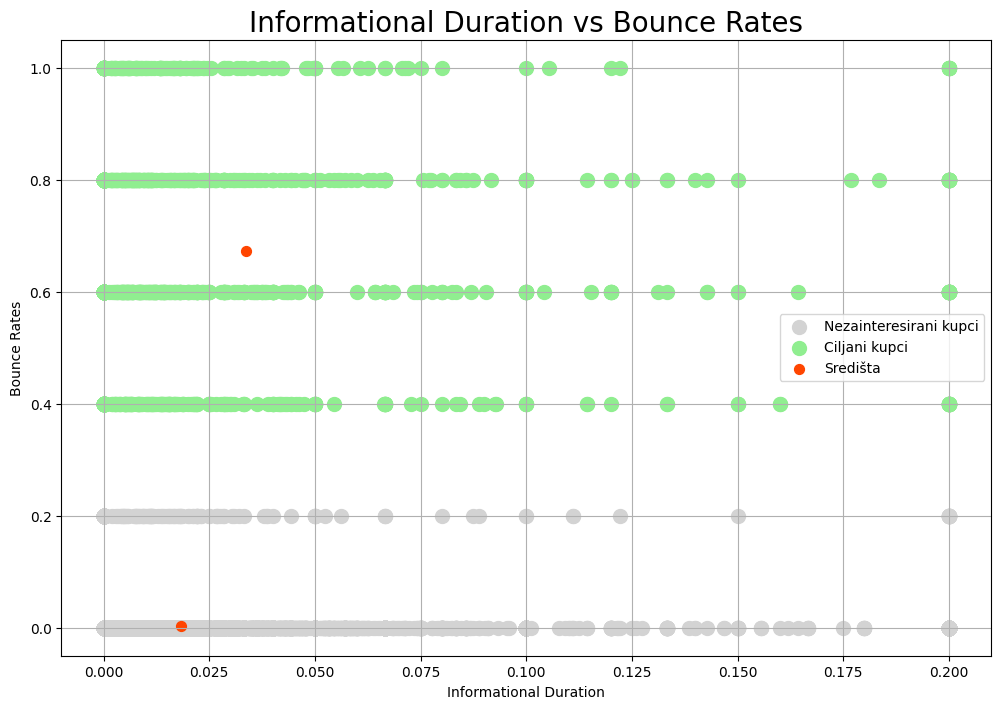

In [ ]:
x = data.iloc[:, [3, 6]].values #Informational Duration i Bounce Rates
km = KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=20, random_state=42)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('Informational Duration vs Bounce Rates', fontsize = 20)
plt.grid()
plt.xlabel('Informational Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### ProductRelated_Duration i BounceRates

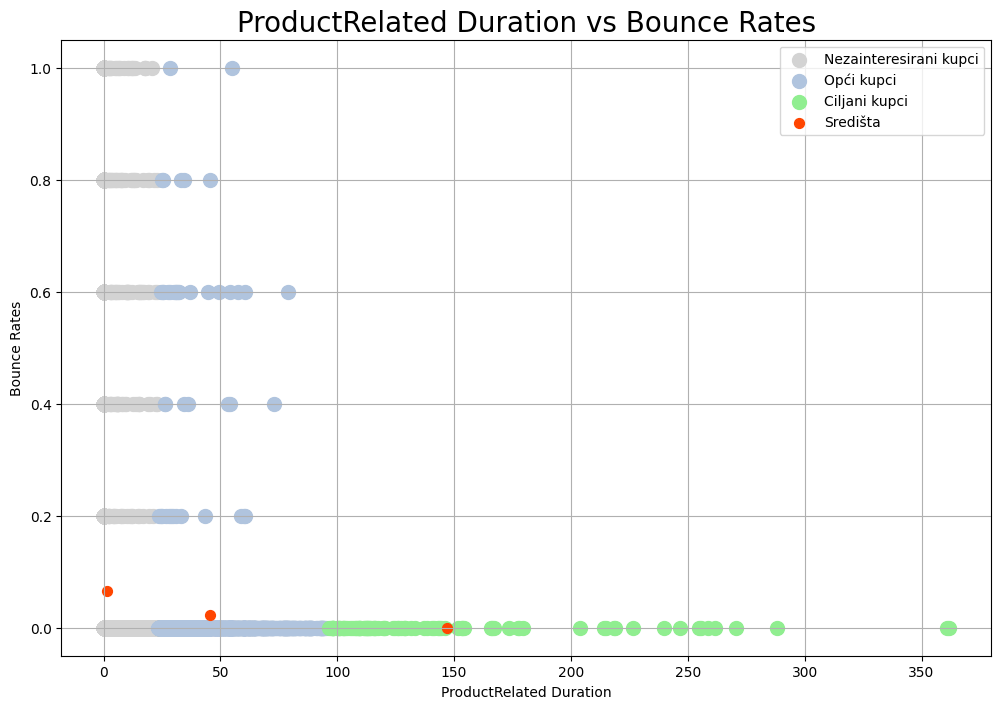

In [ ]:
x = data.iloc[:, [5, 6]].values #ProductRelated Duration i Bounce Rates
km = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=20, random_state=42)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('ProductRelated Duration vs Bounce Rates', fontsize=20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

### ProductRelated_Duration i ExitRates

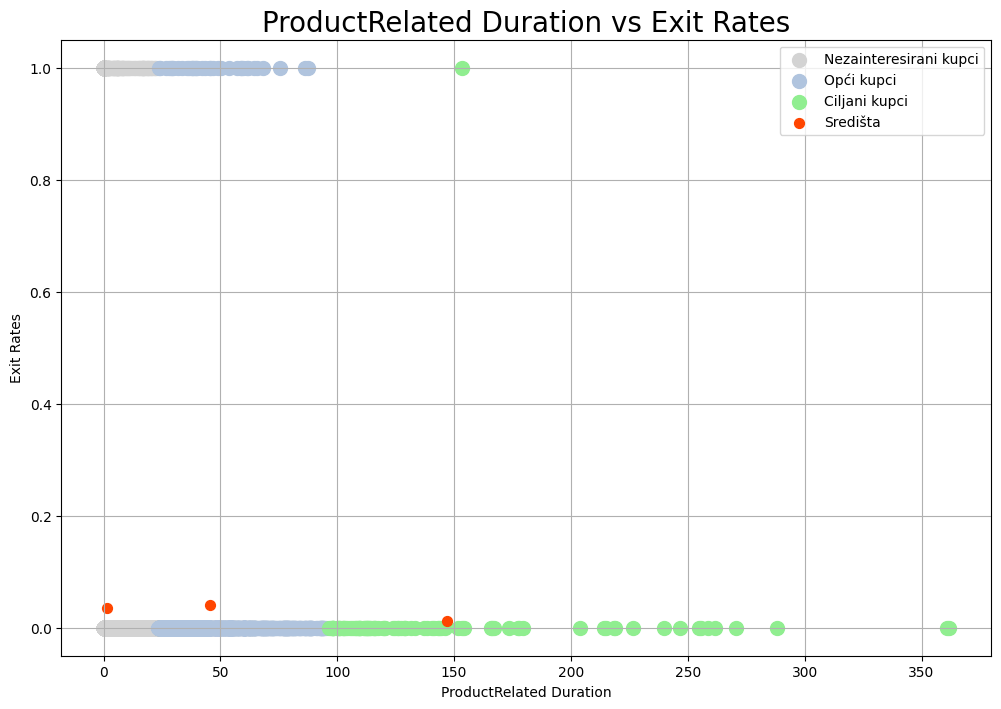

In [ ]:
x = data.iloc[:, [5, 7]].values #ProductRelated Duration i Exit Rates
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('ProductRelated Duration vs Exit Rates', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Exit Rates')
plt.legend()
plt.show()

### ProductRelated_Duration i SpecialDay

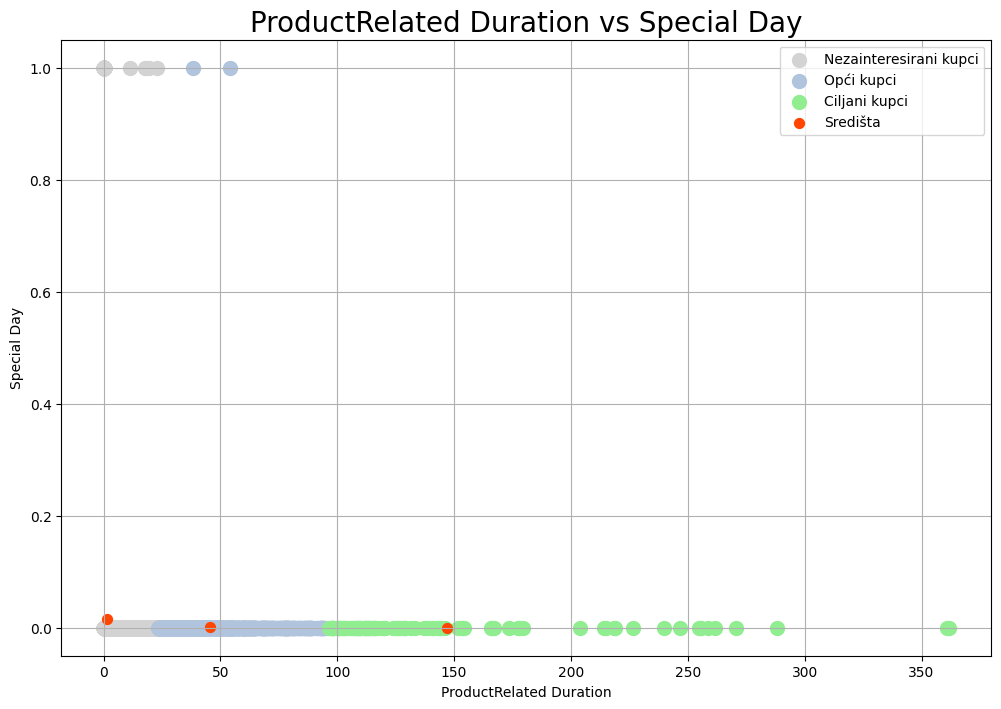

In [ ]:
x = data.iloc[:, [5, 9]].values #ProductRelated Duration i SpecialDay
km = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_means = km.fit_predict(x)

centers = km.cluster_centers_
sorted_indices = np.argsort(centers[:, 0])  # Sort centroids by x-coordinate

# Create a mapping for labels
label_mapping = {original: new for new, original in enumerate(sorted_indices)}
y_means = np.array([label_mapping[label] for label in y_means])  # Reassign labels
km.cluster_centers_ = centers[sorted_indices]  # Sort centroids accordingly

plt.figure(figsize=(12, 8))

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s=100, c='lightgray', label='Nezainteresirani kupci')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s=100, c='lightsteelblue', label='Opći kupci')
plt.scatter(x[y_means == 2, 0], x[y_means == 2, 1], s=100, c='lightgreen', label='Ciljani kupci')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=50, c='orangered', label='Središta')

plt.title('ProductRelated Duration vs Special Day', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Special Day')
plt.legend()
plt.show()

**2D vizualizacija klastera**

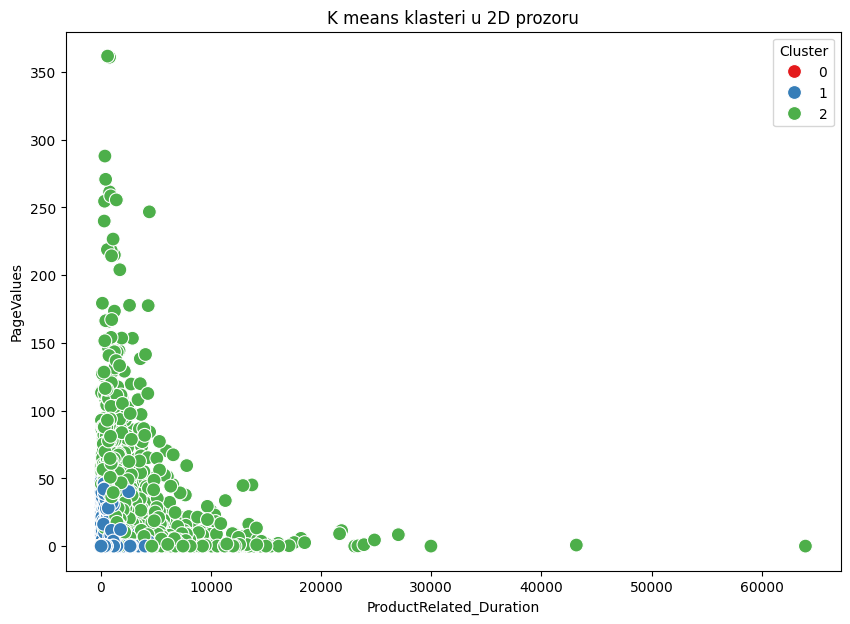

In [ ]:
data['Cluster'] = kmeans_clusters

plt.figure(figsize=(10, 7))
sns.scatterplot(x='ProductRelated_Duration', y='PageValues', hue='Cluster', data=data, palette='Set1', s=100)
plt.title('K means klasteri u 2D prozoru')
plt.xlabel('ProductRelated_Duration')
plt.ylabel('PageValues')
plt.show()

**3D vizualizacija klastera**

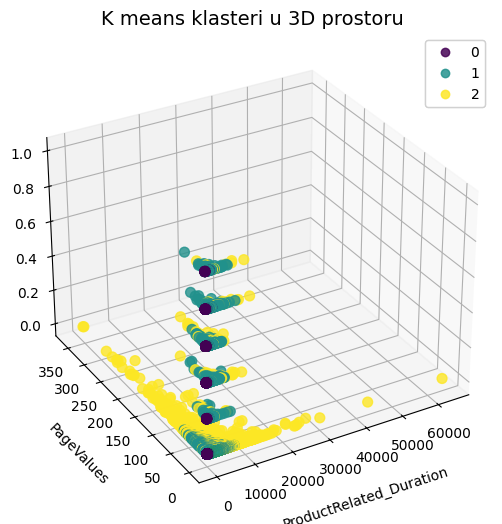

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Stvaranje figure i dodavanje 3D podgrafikona
fig = plt.figure(figsize=(8, 6))  # Postavljanje figure (prostora) s dimenzijama 8x6 inča
ax = fig.add_subplot(111, projection='3d') # Dodavanje 3D podgrafa u figuru. '111' znači da je ovo jedini podgraf (1 red, 1 stupac, prvi podgraf), a 'projection='3d'' specificira da je grafikon u 3D

# Scatter plot za prikaz klastera
scatter = ax.scatter(
    data['ProductRelated_Duration'],  # X-os
    data['PageValues'], # Y-os
    data['SpecialDay'], # Z-os
    c=data['Cluster'], # parametar 'c' koristi stupac 'Cluster' kako bi svaka točka imala boju ovisno o tome kojem klasteru pripada
    cmap='viridis',
    s=50,  # veličina svake točke na grafikonu
    alpha=0.8  # alpha postavlja prozirnost točaka na 80%, što olakšava preglednost ako se točke preklapaju
)

# Dodavanje naslova i oznaka za osi
ax.set_title('K means klasteri u 3D prostoru', fontsize=14)
ax.set_xlabel('ProductRelated_Duration', fontsize=10, labelpad=10) # Oznaka za X-os s veličinom fonta 12 i razmakom od osi (labelpad) 10
ax.set_ylabel('PageValues', fontsize=10, labelpad=10) # Oznaka za Y-os
ax.set_zlabel('SpecialDay', fontsize=10, labelpad=10) # Oznaka za Z-os

# Postavljanje kuta gledanja (rotacija grafikona)
ax.view_init(elev=30, azim=240)

# Dodavanje legende
# 'legend_elements()' automatski generira elemente legende iz scatter plota, a 'loc="best"' automatski postavlja legendu na najbolju poziciju
legend1 = ax.legend(*scatter.legend_elements(), loc="best")
ax.add_artist(legend1) # Dodaje kreiranu legendu na grafikon

# Prilagođavanje margina
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Prikaz grafikona
plt.show()